<a href="https://colab.research.google.com/github/shakebkhan/deeplearning/blob/main/DLNLP_Project_1_035051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Calling libraries
import pandas as pd
import numpy as np
from  pathlib import Path

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

In [3]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [12]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/deeplearning/"

In [13]:
# 2.2 Full file path:
path = Path(pathToFolder) / "car_price_prediction.csv"

In [14]:
# 3.0 Read data
car_price = pd.read_csv(path)
car_price.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [15]:
# 3.1
car_price.shape
car_price.dtypes

(19237, 18)

ID                   int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
Price                int64
dtype: object

In [16]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Levy              19237 non-null  object
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  object
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Doors             19237 non-null  object
 14  Wheel             19237 non-null  object
 15  Color             19237 non-null  object
 16  Airbags           19237 non-null  int64 
 17  Price       

In [17]:
car_price.drop(columns=['ID'],inplace=True)
car_price.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [18]:
# Treating Levy Column
car_price.replace(to_replace = "-" , value = 0 , inplace = True)
tra_1 = car_price["Levy"].astype(int)
car_price.drop("Levy" , axis = 1 , inplace = True)
car_price = pd.concat([car_price , tra_1] , axis = 1 , join = "inner")

In [20]:
car_price.head()

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Levy
0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328,1399
1,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621,1018
2,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467,0
3,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607,862
4,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726,446


In [22]:
# Encoding Leather interior column
car_price.replace(to_replace = "Yes" , value = 1 , inplace = True)
car_price.replace(to_replace = "No" , value = 0 , inplace = True)

In [23]:
car_price

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Levy
0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328,1399
1,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621,1018
2,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467,0
3,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607,862
4,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726,446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5,8467,0
19233,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8,15681,831
19234,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4,26108,836
19235,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4,5331,1288


In [24]:
# Treating Mileage column
trans_1 = car_price["Mileage"].str.split(" km" , n = 0 , expand = True)
car_price.drop("Mileage" , axis = 1 , inplace = True)
tra_2 = trans_1[0].astype(int)
car_price["Mileage"] = tra_2
car_price.head()

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Levy,Mileage
0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328,1399,186005
1,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621,1018,192000
2,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,4,Variator,Front,04-May,Right-hand drive,Black,2,8467,0,200000
3,FORD,Escape,2011,Jeep,1,Hybrid,2.5,4,Automatic,4x4,04-May,Left wheel,White,0,3607,862,168966
4,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,4,Automatic,Front,04-May,Left wheel,Silver,4,11726,446,91901


In [25]:
# Treating Engine volume culumn
trans_2 = car_price["Engine volume"].str.split(" Turbo" , n = 1 , expand = True)
tra_3 = trans_2[0].astype(float)
car_price["Engine volume1"] = tra_3
car_price["Turbo"] = trans_2[1]
car_price.drop("Engine volume" , axis = 1 , inplace = True)
car_price.replace(to_replace = "" , value = 1 , inplace = True)
car_price["Turbo"].fillna(value = 0 , axis = 0 , inplace = True)

In [26]:
car_price.head()

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Levy,Mileage,Engine volume1,Turbo
0,LEXUS,RX 450,2010,Jeep,1,Hybrid,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328,1399,186005,3.5,0.0
1,CHEVROLET,Equinox,2011,Jeep,0,Petrol,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621,1018,192000,3.0,0.0
2,HONDA,FIT,2006,Hatchback,0,Petrol,4,Variator,Front,04-May,Right-hand drive,Black,2,8467,0,200000,1.3,0.0
3,FORD,Escape,2011,Jeep,1,Hybrid,4,Automatic,4x4,04-May,Left wheel,White,0,3607,862,168966,2.5,0.0
4,HONDA,FIT,2014,Hatchback,1,Petrol,4,Automatic,Front,04-May,Left wheel,Silver,4,11726,446,91901,1.3,0.0


In [28]:
# Numeric Encoding of categorical Data Using Scikit Learn : Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
car_price_cat = car_price[['Manufacturer',	'Category','Fuel type',	'Gear box type','Drive wheels',	'Wheel','Color']]
oe_fit = oe.fit_transform(car_price_cat)
car_price_cat_oe = pd.DataFrame(oe_fit, columns=['Manufacturer',	'Category','Fuel type',	'Gear box type','Drive wheels',	'Wheel','Color'])
car_price_cat_oe

,Manufacturer,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,32.0,4.0,2.0,0.0,0.0,0.0,12.0
1,8.0,4.0,5.0,2.0,0.0,0.0,1.0
2,21.0,3.0,5.0,3.0,1.0,1.0,1.0
3,16.0,4.0,2.0,0.0,0.0,0.0,14.0
4,21.0,3.0,5.0,0.0,1.0,0.0,12.0
...,...,...,...,...,...,...,...
19232,36.0,1.0,0.0,1.0,2.0,0.0,12.0
19233,23.0,9.0,5.0,2.0,1.0,0.0,11.0
19234,23.0,4.0,1.0,0.0,1.0,0.0,7.0
19235,8.0,4.0,1.0,0.0,1.0,0.0,1.0


In [29]:
car_price_rem = car_price[['Model',	'Prod. year', 'Leather interior', 'Cylinders', 'Doors',	'Airbags',	'Price',	'Levy',	'Mileage',	'Engine volume1',	'Turbo']]
car_data = car_price_rem.join(car_price_cat_oe)
car_data

,Model,Prod. year,Leather interior,Cylinders,Doors,Airbags,Price,Levy,Mileage,Engine volume1,Turbo,Manufacturer,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,RX 450,2010,1,6,04-May,12,13328,1399,186005,3.5,0.0,32.0,4.0,2.0,0.0,0.0,0.0,12.0
1,Equinox,2011,0,6,04-May,8,16621,1018,192000,3.0,0.0,8.0,4.0,5.0,2.0,0.0,0.0,1.0
2,FIT,2006,0,4,04-May,2,8467,0,200000,1.3,0.0,21.0,3.0,5.0,3.0,1.0,1.0,1.0
3,Escape,2011,1,4,04-May,0,3607,862,168966,2.5,0.0,16.0,4.0,2.0,0.0,0.0,0.0,14.0
4,FIT,2014,1,4,04-May,4,11726,446,91901,1.3,0.0,21.0,3.0,5.0,0.0,1.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,CLK 200,1999,1,4,02-Mar,5,8467,0,300000,2.0,1.0,36.0,1.0,0.0,1.0,2.0,0.0,12.0
19233,Sonata,2011,1,4,04-May,8,15681,831,161600,2.4,0.0,23.0,9.0,5.0,2.0,1.0,0.0,11.0
19234,Tucson,2010,1,4,04-May,4,26108,836,116365,2.0,0.0,23.0,4.0,1.0,0.0,1.0,0.0,7.0
19235,Captiva,2007,1,4,04-May,4,5331,1288,51258,2.0,0.0,8.0,4.0,1.0,0.0,1.0,0.0,1.0


In [30]:
# 3.2 We do not need Model column, Doors column
car_data.drop(columns = ['Model','Doors'],inplace = True  )
car_data

,Prod. year,Leather interior,Cylinders,Airbags,Price,Levy,Mileage,Engine volume1,Turbo,Manufacturer,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,2010,1,6,12,13328,1399,186005,3.5,0.0,32.0,4.0,2.0,0.0,0.0,0.0,12.0
1,2011,0,6,8,16621,1018,192000,3.0,0.0,8.0,4.0,5.0,2.0,0.0,0.0,1.0
2,2006,0,4,2,8467,0,200000,1.3,0.0,21.0,3.0,5.0,3.0,1.0,1.0,1.0
3,2011,1,4,0,3607,862,168966,2.5,0.0,16.0,4.0,2.0,0.0,0.0,0.0,14.0
4,2014,1,4,4,11726,446,91901,1.3,0.0,21.0,3.0,5.0,0.0,1.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,1999,1,4,5,8467,0,300000,2.0,1.0,36.0,1.0,0.0,1.0,2.0,0.0,12.0
19233,2011,1,4,8,15681,831,161600,2.4,0.0,23.0,9.0,5.0,2.0,1.0,0.0,11.0
19234,2010,1,4,4,26108,836,116365,2.0,0.0,23.0,4.0,1.0,0.0,1.0,0.0,7.0
19235,2007,1,4,4,5331,1288,51258,2.0,0.0,8.0,4.0,1.0,0.0,1.0,0.0,1.0


In [31]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prod. year        19237 non-null  int64  
 1   Leather interior  19237 non-null  int64  
 2   Cylinders         19237 non-null  int64  
 3   Airbags           19237 non-null  int64  
 4   Price             19237 non-null  int64  
 5   Levy              19237 non-null  int64  
 6   Mileage           19237 non-null  int64  
 7   Engine volume1    19237 non-null  float64
 8   Turbo             19237 non-null  float64
 9   Manufacturer      19237 non-null  float64
 10  Category          19237 non-null  float64
 11  Fuel type         19237 non-null  float64
 12  Gear box type     19237 non-null  float64
 13  Drive wheels      19237 non-null  float64
 14  Wheel             19237 non-null  float64
 15  Color             19237 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 2.

In [32]:
# Variable-wise Missing Data Information
variable_missing_data = car_data.isna().sum()
variable_missing_data

Prod. year          0
Leather interior    0
Cylinders           0
Airbags             0
Price               0
Levy                0
Mileage             0
Engine volume1      0
Turbo               0
Manufacturer        0
Category            0
Fuel type           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
dtype: int64

In [33]:
# Getting target and predictors:
X = car_data.drop(columns=['Price'])
y = car_data['Price'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [124]:
# Building model:

model = tf.keras.Sequential()

In [125]:
model.add(layers.Input( shape = (15,) ) )

In [126]:
model.add(layers.Dense(15,activation='relu') )

In [127]:
model.add(layers.Dense(300,activation='relu') )

In [128]:
model.add(layers.Dense(600,activation='relu') )

In [129]:
model.add(layers.Dense(150,activation='relu') )

In [130]:
model.add(layers.Dense(1, activation='linear'))

In [131]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 15)                240       
                                                                 
 dense_21 (Dense)            (None, 300)               4800      
                                                                 
 dense_22 (Dense)            (None, 600)               180600    
                                                                 
 dense_23 (Dense)            (None, 150)               90150     
                                                                 
 dense_24 (Dense)            (None, 1)                 151       
                                                                 
Total params: 275,941
Trainable params: 275,941
Non-trainable params: 0
_________________________________________________________________


In [132]:
#4.3 Compile
model.compile( loss = "mae",optimizer='Adam')

In [133]:
# 4.4 Train
history = model.fit(X_train_trf,y_train, epochs = 100, validation_split=0.2 )

Epoch 1/100
385/385 [==============================] - 2s 4ms/step - loss: 14165.7168 - val_loss: 10208.1602
Epoch 2/100
385/385 [==============================] - 2s 4ms/step - loss: 11948.9238 - val_loss: 9323.4238
Epoch 3/100
385/385 [==============================] - 2s 4ms/step - loss: 11301.1338 - val_loss: 8720.5869
Epoch 4/100
385/385 [==============================] - 1s 4ms/step - loss: 10394.1494 - val_loss: 7646.1338
Epoch 5/100
385/385 [==============================] - 2s 6ms/step - loss: 9525.2061 - val_loss: 7260.1475
Epoch 6/100
385/385 [==============================] - 2s 5ms/step - loss: 9211.8916 - val_loss: 7204.4814
Epoch 7/100
385/385 [==============================] - 2s 4ms/step - loss: 9046.2773 - val_loss: 6937.1494
Epoch 8/100
385/385 [==============================] - 2s 4ms/step - loss: 8913.7539 - val_loss: 6886.3242
Epoch 9/100
385/385 [==============================] - 2s 5ms/step - loss: 8801.6484 - val_loss: 6891.1074
Epoch 10/100
385/385 [==========

In [134]:
# 5.0 Predict
pred = model.predict(X_test_trf)

121/121 [==============================] - 0s 1ms/step


In [135]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5509779374330557

In [136]:
model.evaluate(X_test_trf,y_test)

121/121 [==============================] - 0s 1ms/step - loss: 5853.5513


5853.55126953125

In [137]:
from tensorflow.keras.utils import plot_model

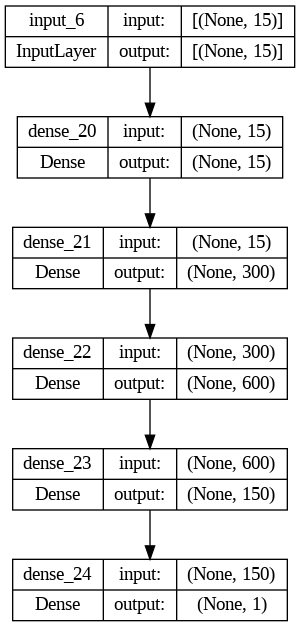

In [138]:
plot_model(model,show_shapes=True)

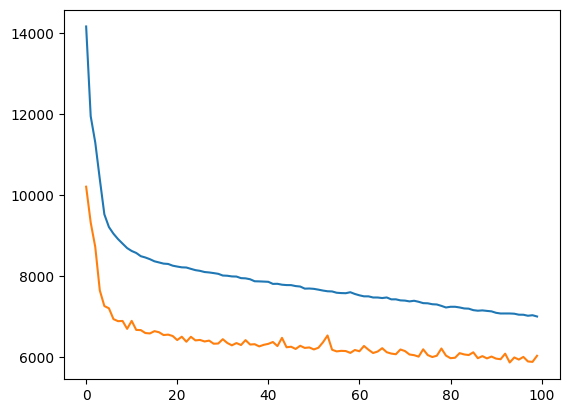

In [139]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])